In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('tips.csv')

In [3]:
dataset.shape

(244, 7)

In [4]:
pd.set_option('display.max_rows', 244)

In [5]:
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [6]:
print(dataset.head())
print(dataset.tail())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [7]:
dataset.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
dataset.describe(include='all') #includes categorical columns as well

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [9]:
dataset.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [10]:
dataset.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [11]:
dataset.isnull().values.any()  #To check if there are any null values in the dataset

False

In [12]:
dataset.isnull().sum()  #Returns the total number of missing values across different columns

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [13]:
#d1= dataset['col_name'].fillna(0) -> to replace missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


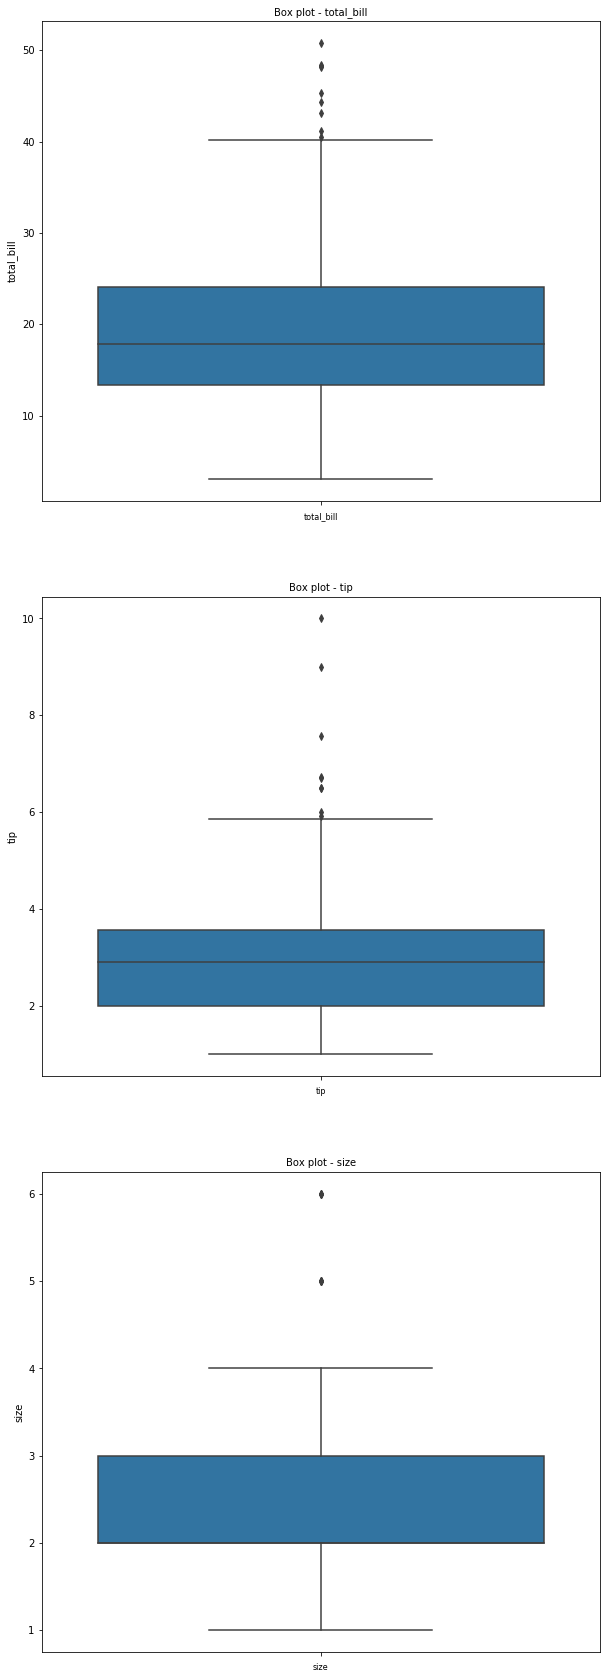

In [14]:
#Outlier Detection Analysis using box plot
col_names = ['total_bill','tip', 'size']
fig, ax = plt.subplots(len(col_names), figsize=(10,30))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)


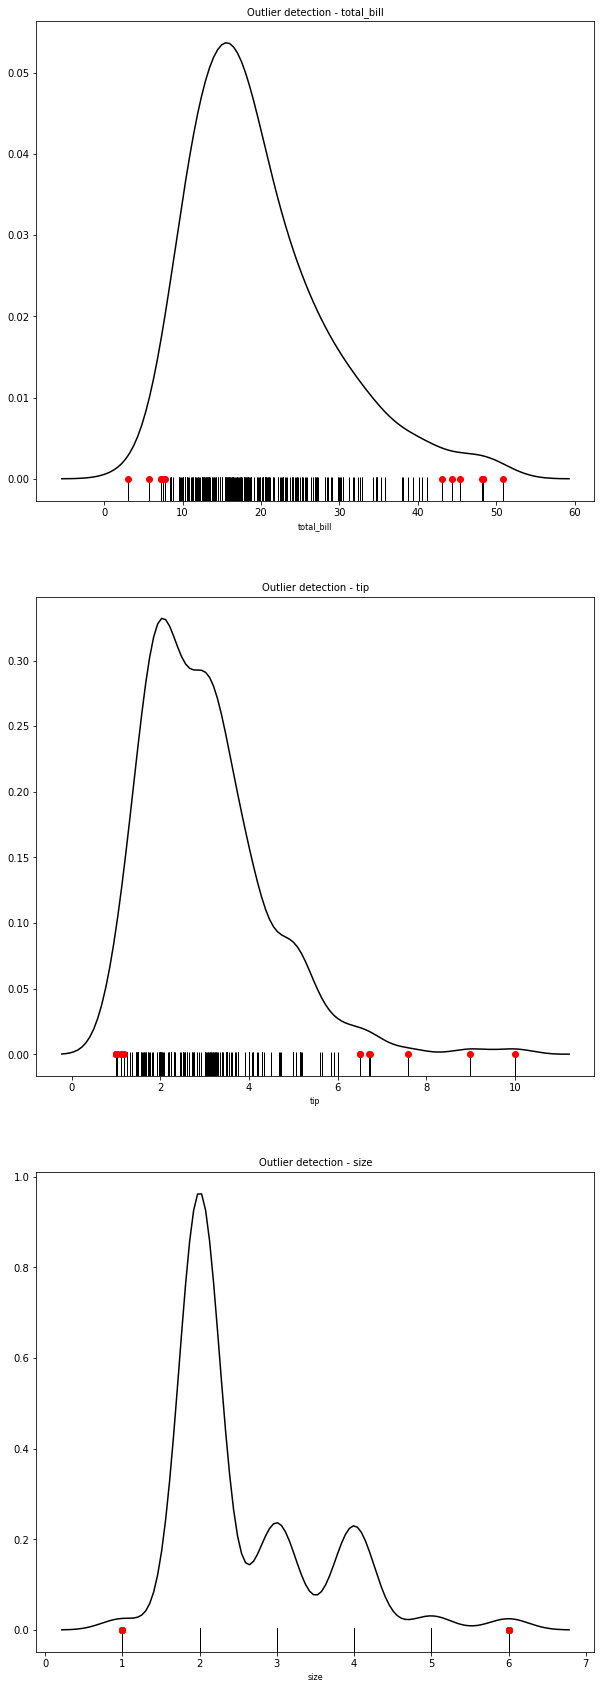

In [15]:
#Percentile based outlier removal   
  # Percentile based outlier removal -> Here we filter out outliers based on fixed percentile values. 
  # The other techniques in this category include removal based on z-score, constant values etc.

def percentile_based_outlier(data, threshold=95):   # 95-> threshold percentile(default value)
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['total_bill','tip', 'size']

fig, ax = plt.subplots(len(col_names), figsize=(10,30))

for i, col_val in enumerate(col_names):
    x = dataset[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, color='black', hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)


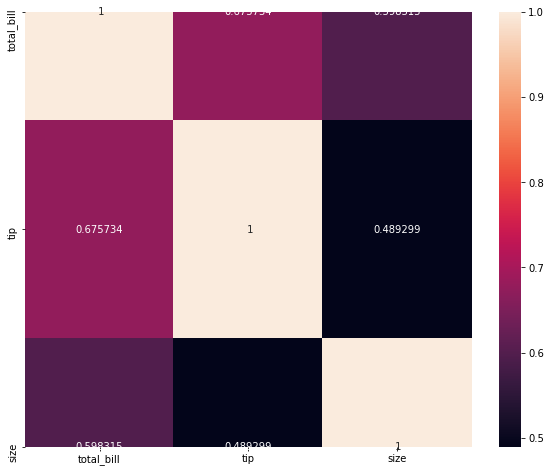

In [16]:
#Correlation matrix
x = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr,annot=True,fmt='2g',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [17]:
#correlation plot -> allows you to see which pairs have the highest correlation. 
  #The pairs which are highly correlated represent the same variance of the dataset thus we can 
  #further analyze them to understand which attribute among the pairs are most significant for building the model.
  #Correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1, 
  #less correlated variables will have correlation value close to -1.

#In this dataset, we don’t see any attributes to be correlated and the diagonal elements of the matrix value 
#are always 1 as we are finding the correlation between the same columns. 
#Thus the inference is that all the numerical attributes are important and should be considered for building the model.
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,total_bill,tip,size
total_bill,1,0.675734,0.598315
tip,0.675734,1,0.489299
size,0.598315,0.489299,1


In [18]:
#Outlier Removal using IQR method
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_in
result=remove_outlier(dataset, 'total_bill')

Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

total_bill    13.3475
tip            2.0000
size           2.0000
Name: 0.25, dtype: float64
total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64
total_bill    10.7800
tip            1.5625
size           1.0000
dtype: float64
total_bill   -2.82250
tip          -0.34375
size          0.50000
dtype: float64 total_bill    40.29750
tip            5.90625
size           4.50000
dtype: float64


In [19]:
result

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [20]:
result.shape

(235, 7)

In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 243
Data columns (total 7 columns):
total_bill    235 non-null float64
tip           235 non-null float64
sex           235 non-null object
smoker        235 non-null object
day           235 non-null object
time          235 non-null object
size          235 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.7+ KB


In [22]:
dataset1 = pd.read_csv("tips.csv", usecols = ['total_bill','tip','size'])
print(dataset1)

     total_bill    tip  size
0         16.99   1.01     2
1         10.34   1.66     3
2         21.01   3.50     3
3         23.68   3.31     2
4         24.59   3.61     4
5         25.29   4.71     4
6          8.77   2.00     2
7         26.88   3.12     4
8         15.04   1.96     2
9         14.78   3.23     2
10        10.27   1.71     2
11        35.26   5.00     4
12        15.42   1.57     2
13        18.43   3.00     4
14        14.83   3.02     2
15        21.58   3.92     2
16        10.33   1.67     3
17        16.29   3.71     3
18        16.97   3.50     3
19        20.65   3.35     3
20        17.92   4.08     2
21        20.29   2.75     2
22        15.77   2.23     2
23        39.42   7.58     4
24        19.82   3.18     2
25        17.81   2.34     4
26        13.37   2.00     2
27        12.69   2.00     2
28        21.70   4.30     2
29        19.65   3.00     2
30         9.55   1.45     2
31        18.35   2.50     4
32        15.06   3.00     2
33        20.6

In [23]:
#Outlier Removal using z-score

from scipy import stats
z=np.abs(stats.zscore(dataset['total_bill']))
z1=np.abs(stats.zscore(dataset['tip']))
z2=np.abs(stats.zscore(dataset['size']))
print(z)
print("\n")
print(z1)
print("\n")
print(z2)


[3.14711305e-01 1.06323531e+00 1.37779900e-01 4.38315103e-01
 5.40744704e-01 6.19536705e-01 1.23995452e+00 7.98507107e-01
 5.34203307e-01 5.63468908e-01 1.07111451e+00 1.74175992e+00
 4.91430507e-01 1.52624903e-01 5.57840908e-01 2.01939101e-01
 1.06436091e+00 3.93503306e-01 3.16962505e-01 9.72582994e-02
 2.10030504e-01 5.67366990e-02 4.52034507e-01 2.21000952e+00
 3.83349840e-03 2.22412104e-01 7.22178510e-01 7.98719310e-01
 2.15446301e-01 1.53017018e-02 1.15215771e+00 1.61629703e-01
 5.31952107e-01 1.01760699e-01 2.25788904e-01 4.81087904e-01
 3.91252106e-01 3.21464905e-01 1.23359303e-01 1.29264551e+00
 4.21643306e-01 2.61808105e-01 6.58019309e-01 1.13752491e+00
 1.19471831e+00 1.68383303e-01 2.75103101e-01 1.41983831e+00
 9.86482309e-01 1.96523304e-01 8.15603311e-01 1.06886331e+00
 1.69110792e+00 1.10825931e+00 6.49927905e-01 3.33113020e-02
 2.05129992e+00 7.45603907e-01 9.61931312e-01 3.20616553e+00
 5.67366990e-02 6.72652109e-01 9.86694512e-01 1.68383303e-01
 2.47175304e-01 3.309909

In [24]:
#Outliers
print(np.where(z>2))
print("\n")
print(np.where(z1>2))
print("\n")
print(np.where(z2>2))

(array([ 23,  56,  59,  95, 102, 112, 142, 156, 170, 182, 184, 197, 207,
       212]),)


(array([ 23,  47,  59,  88, 141, 170, 183, 212, 214, 239]),)


(array([125, 141, 142, 143, 155, 156, 185, 187, 216]),)


In [25]:
dt=dataset[(z< 2)]
print(dt)
print("\n")
dt1=dataset[(z1< 2)]
print(dt1)
print("\n")
dt2=dataset[(z2< 2)]
print(dt2)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [26]:
dt.shape

(230, 7)

In [27]:
dt1.shape

(234, 7)

In [28]:
dt2.shape

(235, 7)

In [29]:
dataset[dataset['total_bill']>40.298]['total_bill'] 

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

In [30]:
#Linear Regression Model

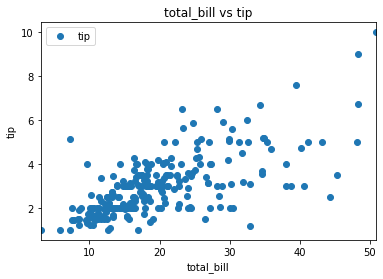

In [31]:
#Lets plot our data points on a 2-D graph to eyeball our dataset 
#and see if we can manually find any relationship between the data. 
#2D graph between total_bill and tip.
dataset.plot(x='total_bill', y='tip', style='o')  
plt.title('total_bill vs tip')  
plt.xlabel('total_bill')  
plt.ylabel('tip')  
plt.show()

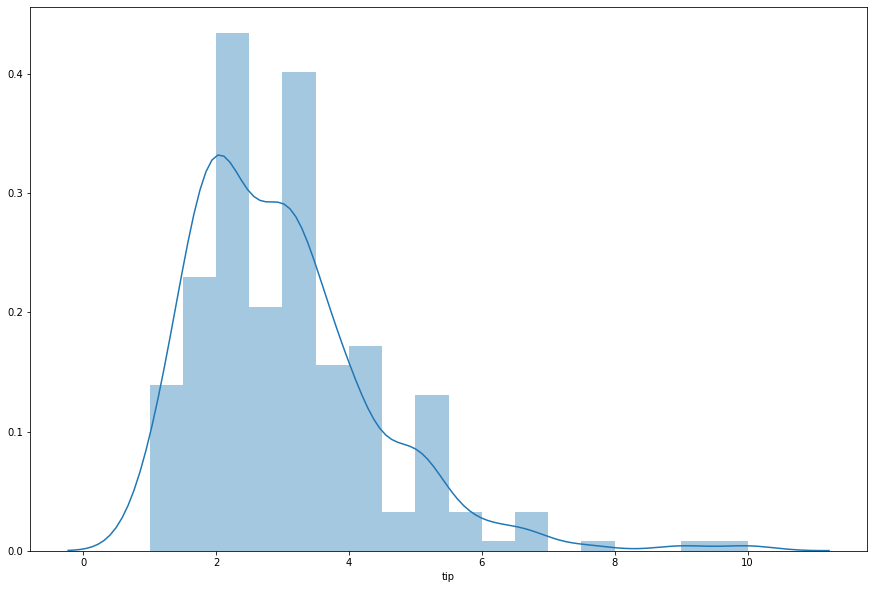

In [32]:
#Average tip is Between Nearly 2 and 3.
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['tip'])

In [45]:
#We want to predict the tip depending upon the total_bill recorded. 
#Therefore our attribute set will consist of the “total_bill” column which is stored in the X variable, 
#and the label will be the “tip” column which is stored in y variable.
X = result['total_bill'].values.reshape(-1,1)
y = result['tip'].values.reshape(-1,1)

In [46]:
# Next, we split 80% of the data to the training set while 20% of the data to test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)  # 0.097->This means that for every one unit of change in total_bill, 
                        # the change in the tip is about 0.09%.


[0.90154903]
[[0.10471478]]


In [37]:
#Now, we have trained our algorithm, it’s time to make some predictions. 
y_pred = regressor.predict(X_test)

In [38]:
#Compare the actual output values for X_test with the predicted values.
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3.00,2.544524
1,3.48,3.249254
2,3.00,2.574891
3,2.00,2.316246
4,2.75,2.279595
5,4.67,4.653479
6,2.74,2.708926
7,3.76,2.811547
8,1.73,1.925660
9,4.30,2.610494


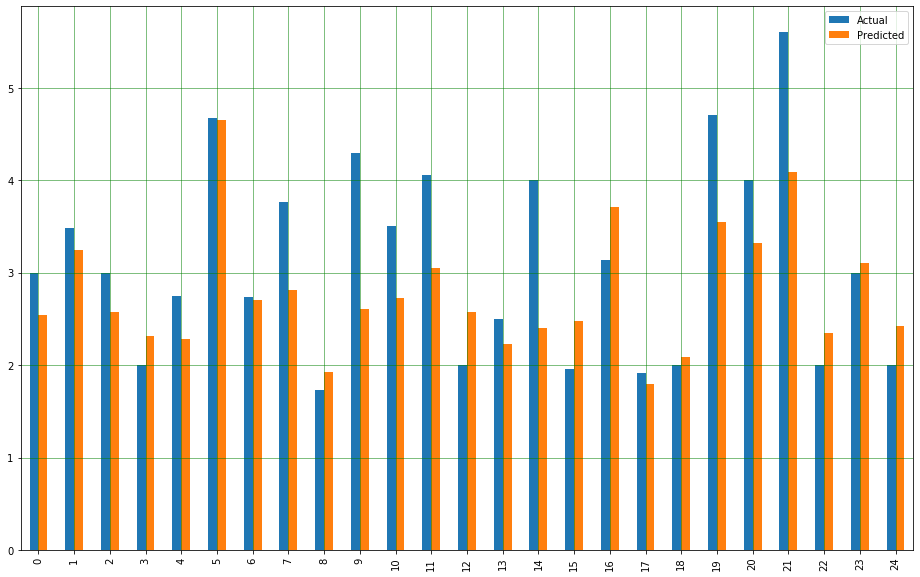

In [39]:
#As the number of records is huge, for representation purpose take 25 records.
#Bar graph
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

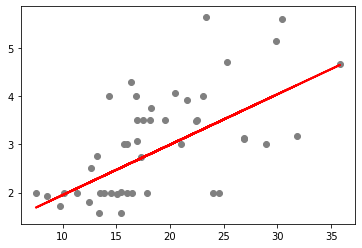

In [40]:
#Plot straight line with test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
#The straight line in the below graph shows our algorithm is correct.

In [41]:
#The final step is to evaluate the performance of the algorithm.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6934649953171393
Mean Squared Error: 0.7285404889125501
Root Mean Squared Error: 0.8535458329302241


In [47]:
#Lower values of RMSE indicate better fit. 
#RMSE is a good measure of how accurately the model predicts the response, 
#and it is the most important criterion for fit if the main purpose of the model is prediction.

#WE can see that the value of root mean squared error is 0.85, which is more than 10% of the mean value of the percentages of all the tip i.e. 2.99. 
#This means that our algorithm can make reasonably good predictions.